# Center Limit Therom

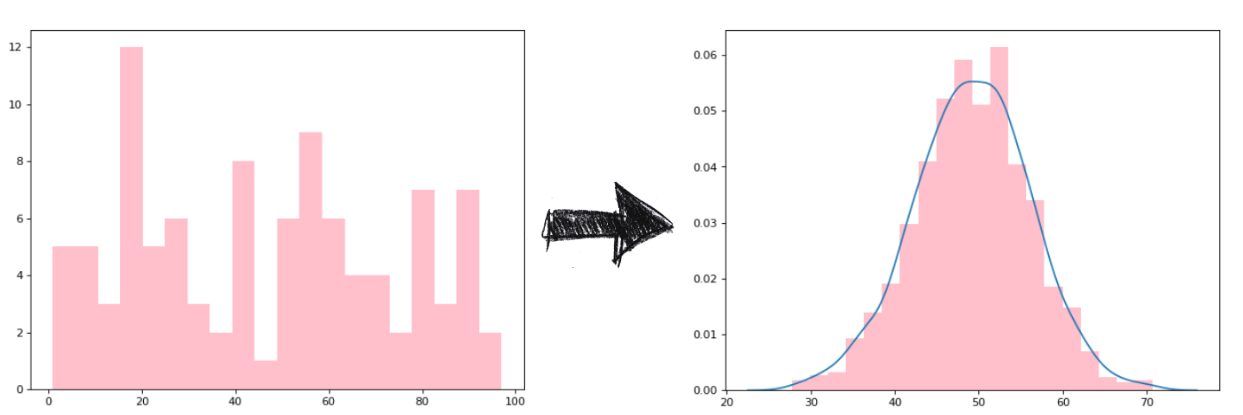

- This thorem states that as size of samples increases,the distribution of mean across sample will approximate a Gaussian Distribution.

- If we pick N no.of samples from population and the calculate mean of all samples and if we plot across acround x,y axis we will get Normal Distribution and Gassian Distribution.

# Feature Scaling Technique

- Used to remove irrelevant feature.
- Improve accuracy.
- Performance Tunning.
- To reduce dimension (training time reduce).

#### Types Of Methods

#### Filter Methods

- Co-relation Coefficeint.
- Chi - Square test.
- Information Gain.
- Missing Value ratio.
- Annova Test.
- Fishers Score.

##### Wrapper Methods.

- Forward Selection.
- Backword Selection.
- Recrusive Feature Selection.
- Exhaustive Feature Selection.

##### Embedded Method.

- Random Forest Importance.
- Requliarization.

##### Input Feature   --------------->   Target Feature

- Contineous  ---------------> Contineous  ---------------> Corelation Coeffcients.
- Contineous  ---------------> Categorical ---------------> Annova Test.
- Categorical ---------------> Contineous  ---------------> Kendalls rank Coeff.
- Categorical ---------------> Categorical ---------------> Chi Square Test.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Model\titanic.csv").dropna()

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [4]:
x = df[[col for col in df.columns if col in ['Sex','Embarked']]]

In [5]:
x

,Sex,Embarked
1,female,C
3,female,S
6,male,S
10,female,S
11,female,S
...,...,...
871,female,S
872,male,S
879,female,C
887,female,S


In [6]:
y = df['Survived']

In [7]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [8]:
x['Sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
x['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [10]:
ob = OrdinalEncoder(categories=[['female', 'male'],['C', 'S', 'Q']])

In [11]:
ob.fit(x)

OrdinalEncoder(categories=[['female', 'male'], ['C', 'S', 'Q']])

In [12]:
ob.transform(x)

array([[0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [1., 2.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [13]:
x1 = pd.DataFrame(ob.transform(x),columns=['En_Gen','En__Embarked'])

In [14]:
x1.head()

,En_Gen,En__Embarked
0,0.0,0.0
1,0.0,1.0
2,1.0,1.0
3,0.0,1.0
4,0.0,1.0


In [22]:
Chi_Sq,P_val = chi2(x1,y)

In [23]:
print(Chi_Sq)
print(P_val)

[24.94526316  0.8196748 ]
[5.89812658e-07 3.65275265e-01]


In [24]:
P_val = np.around(P_val,5)

In [25]:
P_val

array([0.     , 0.36528])

In [27]:
df_Sq = pd.DataFrame({'Features':x1.columns,'Chi_Sq':Chi_Sq,'P_val':P_val})

In [28]:
df_Sq

,Features,Chi_Sq,P_val
0,En_Gen,24.945263,0.00000
1,En__Embarked,0.819675,0.36528


###### NOTE

- If P_val>0.05 then particular col is independant.
- If P_val<0.05 then particular col is dependant.

#### Information Gain

In [29]:
from sklearn.feature_selection import mutual_info_classif

In [30]:
Info_data = mutual_info_classif(x1,y)

In [31]:
Info_data

array([0.1467671 , 0.00483017])

In [36]:
a1 = pd.Series(Info_data)

<Axes: >

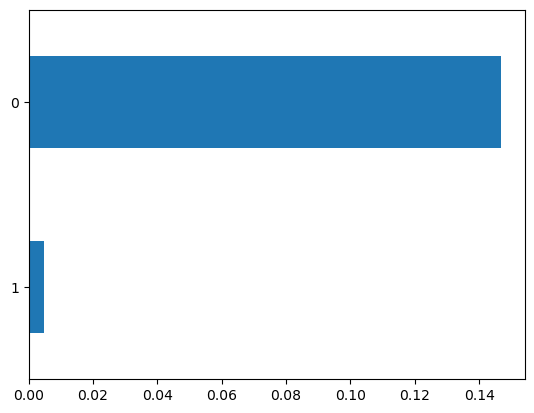

In [38]:
a1.sort_values(ascending=True).plot(kind='barh')

#### Missing Value Ratio

In [43]:
dn = pd.read_csv(r"C:\Users\tsd95\CSV Files\Model\titanic.csv")
dn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
a2 = (dn.isnull().sum()/dn.shape[0])*100

In [45]:
a2

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

- The col which have More Null values(sum) then it is independant feature.

#### Fisher Score

In [46]:
!pip install skfeature-chappers

     -------------------------------------- 66.3/66.3 kB 603.1 kB/s eta 0:00:00


In [47]:
from skfeature.function.similarity_based import fisher_score

In [50]:
a3 = fisher_score.fisher_score(x1.values,y.values)

In [51]:
a3

array([1, 0])

In [52]:
a4 = pd.Series(a3)

In [53]:
a4.index = x1.columns

<Axes: >

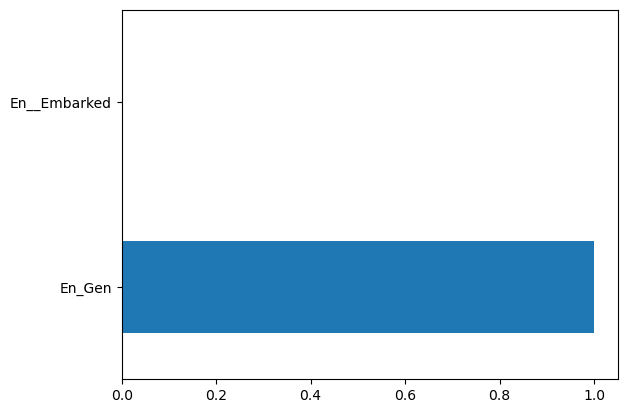

In [54]:
a4.sort_values(ascending=False).plot(kind='barh')